## Important analysis


In [10]:
import pandas as pd
import os


### merging 12 months of data

In [11]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
files = [file for file in os.listdir('./Sales_Data')]  # list comprehension

all_months_data = pd.DataFrame()  # put into dataframe

for file in files:  # merge 12 sheets into 1 dataframe
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)  # without first column with numbers


### read updated dataframe

In [12]:
all_data = pd.read_csv('all_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### clean up the data

#### Drop rows with 'NaN'

In [13]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')  # delete all Nan
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' error and delete it

In [14]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] # delete Or


#### Convert columns to correct type

In [15]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])  # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])  # make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional column

### Add month column

In [16]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add sales column

In [17]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

cols = list(all_data.columns.values)

all_data = all_data[cols[0:4] + [cols[-1]] + cols[4:7]]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a City column

In [18]:
# with apply() method
def get_city(address):
    return address.split(',')[1]


def get_state(address):
    return address.split(',')[2].split(' ')[1]

# all_data['City']=all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x)) # one way to do it
# another way to do it with f' strng
all_data['City']=all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

# all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1]) # this is another way

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### What was the best month for sales? How much was earned that month?

In [19]:
results = all_data.groupby('Month').sum()

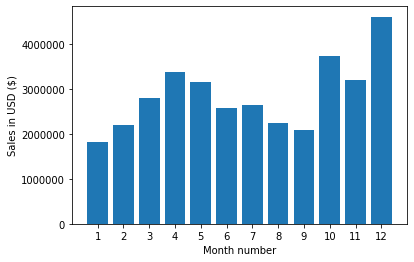

In [20]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)  # display all numbers 
plt.xlabel('Month number')
plt.ylabel('Sales in USD ($)')

plt.show()

### What city had the highest number of sales?

In [21]:
results = all_data.groupby('City').sum()
results


,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


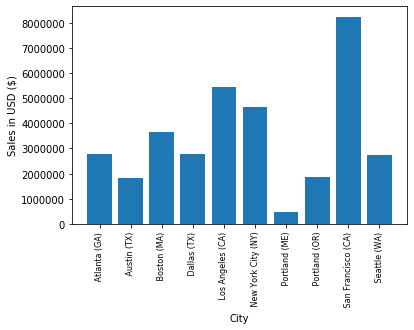

In [22]:
import matplotlib.pyplot as plt

# cities = all_data['City'].unique() # the order of cities was the same but groupby changed the ordrer of values 
cities = [city for city, df in all_data.groupby('City') ]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8) 
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')

plt.show()

### What time should we display adds to maximize likelihood of customer's buying the product?

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [24]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [28]:
all_data['Hour'] = all_data['Order Date'].dt.hour # we create new column 'Hour' which displays hour of order
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27


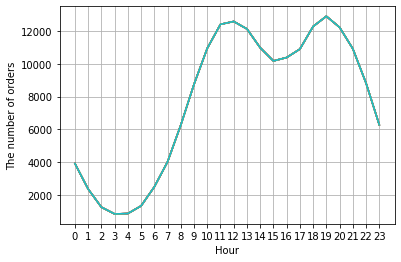

In [36]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count()) 
# all_data.groupby(['Hour']).count() # display the table
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('The number of orders')
plt.show()
# Addvertisements should be displayd at around 11 am and 7 pm.

### Make separate graphs for each city and find the best hour for every city! 

### What products are most often sold together?

In [37]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27


In [43]:
df = all_data[all_data['Order ID'].duplicated(keep = False)] # False is because we want all occurance of duplicate

df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # we created new column and we grouped by ID and we want only Products
# transform 
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [49]:
# taken from stackoverflow

from itertools import combinations
from collections import Counter


count = Counter()

for row in df['Grouped']:
    row_list = row.split(',') # we get sublist from Grouped list
    count.update(Counter(combinations(row_list, 2))) # 2 is because we want to count 2 things that occured most often 
    
for key, value in count.most_common(10):
    print(key, value)



('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most?

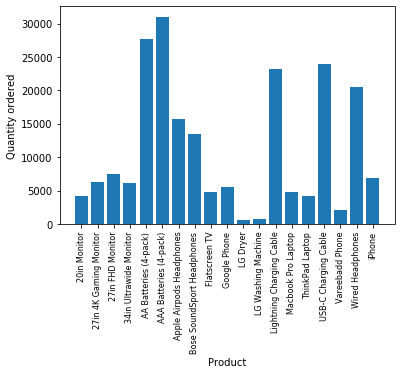

In [57]:
import matplotlib.pyplot as plt

# all_data.head()
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group ]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8) 
plt.xlabel('Product')
plt.ylabel('Quantity ordered')

plt.show()


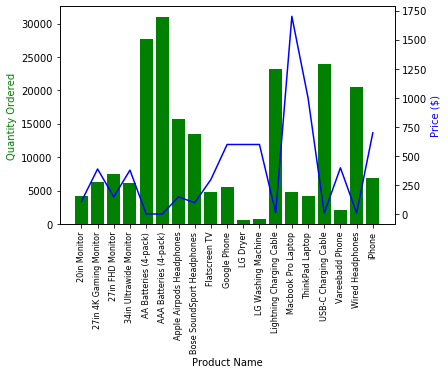

In [61]:
prices = all_data.groupby('Product').mean()["Price Each"]
#print(prices)
# we add another graph
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')


ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)' , color = "b")

ax1.set_xticklabels(products, rotation = 'vertical', size = 8) 


plt.show()